# Data Cleaning on Installer level

## Input: step 7 panel data

In [4]:
pwd

C:\Users\Herbie Huang\Google Drive\Current_SolarResearch\working_june2020\solar_project\1_code


In [10]:
import delimited "../2_pipeline/panel_step790_100_2two_step.csv" ,clear

(30 vars, 8,127 obs)


## Data Cleaning 

### fill in the missing year variable 

In [11]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2013 |        243        4.71        4.71
       2014 |        565       10.95       15.65
       2015 |        907       17.57       33.22
       2016 |      1,620       31.38       64.61
       2017 |      1,827       35.39      100.00
------------+-----------------------------------
      Total |      5,162      100.00


In [12]:
replace year=2018 if year_month_count>60

(768 real changes made)


In [13]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2013 |        243        4.10        4.10
       2014 |        565        9.53       13.63
       2015 |        907       15.30       28.92
       2016 |      1,620       27.32       56.24
       2017 |      1,827       30.81       87.05
       2018 |        768       12.95      100.00
------------+-----------------------------------
      Total |      5,930      100.00


### fill in the month variable 

In [14]:
su month


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       month |      5,162    6.873111    3.433366          1         12


In [15]:
replace month=year_month_count-12*(year-2013)

(768 real changes made)


In [16]:
br

## drop repetitive installerid and duplicates 

In [17]:
drop v1 installerid
duplicates drop




Duplicates in terms of all variables

(14 observations deleted)


 
### find the unrealistic data point for 'since' variable. 
- Look up installer website and revise  

In [18]:
su since,d


                            Since
-------------------------------------------------------------
      Percentiles      Smallest
 1%         1978              5
 5%         1995              5
10%         2001              5       Obs               7,679
25%         2007              5       Sum of Wgt.       7,679

50%         2009                      Mean           2005.998
                        Largest       Std. Dev.      51.49048
75%         2011           2017
90%         2013           2017       Variance       2651.269
95%         2015           2017       Skewness      -38.22525
99%         2016           2017       Kurtosis       1485.449


In [20]:
tab installer_id if since==5


installer_i |
          d |      Freq.     Percent        Cum.
------------+-----------------------------------
      22773 |          5      100.00      100.00
------------+-----------------------------------
      Total |          5      100.00


In [21]:
replace since=1987 if since==5

(5 real changes made)


### fill in missing quotes_count, experiance, encode state variable 

In [22]:
replace quotes_count=0 if quotes_count==.
gen log_quotes=log(1+quotes_count)
gen experience=year-since
replace experience=0 if experience==.
encode state,gen(state_n)



(2,082 real changes made)


(2,483 missing values generated)

(2,483 real changes made)



### fix the experience variable 

In [24]:
su experience,d


                         experience
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0             -4
 5%            0             -4
10%            0             -4       Obs               8,113
25%            0             -4       Sum of Wgt.       8,113

50%            6                      Mean           5.693455
                        Largest       Std. Dev.      5.748559
75%            8             43
90%           12             43       Variance       33.04593
95%           15             43       Skewness       1.606552
99%           29             43       Kurtosis       7.760298


In [25]:
replace experience=0 if experience<0

(38 real changes made)


(bin=39, start=0, width=1.1025641)


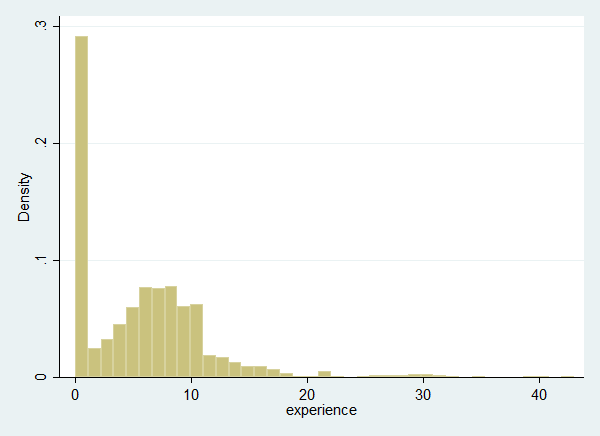

In [26]:
histogram experience



(bin=39, start=0, width=.09703051)


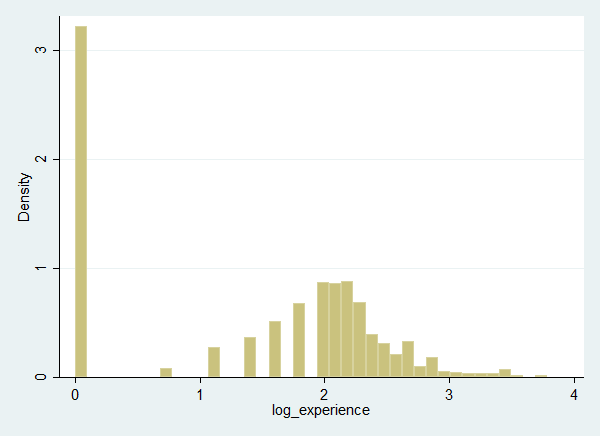

In [27]:
gen log_experience=log(1+experience)
histogram log_experience

In [28]:
xtset installer_id year_month_count

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


### generate new variable to incorporate price info 

In [29]:
su own_price other_prices


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   own_price |      2,304    3.889363    .8173027   1.581735    10.1569
other_prices |      4,957    3.876486    .3898013   2.499707   5.362645


In [30]:
gen temp_own_price_diff_other=own_price-other_prices

(5,956 missing values generated)


In [31]:
su temp_own_price_diff_other


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
temp_own_p~r |      2,157   -.0333584    .8417494  -2.171179   6.641788


In [32]:
replace temp_own_price_diff_other=0 if temp_own_price_diff_other==.

(5,956 real changes made)


(bin=39, start=-2.1711791, width=.2259735)


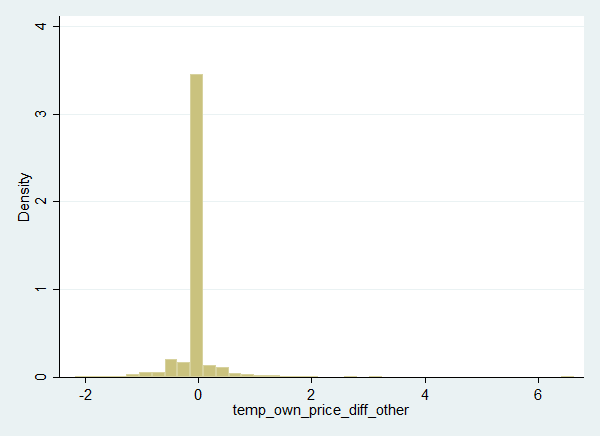

In [33]:
histogram temp_own_price_diff_other

#### generate missing_price_info dummy variable 

In [34]:
gen missing_price_info=0
replace missing_price_info=1 if temp_own_price_diff_other==0



(5,956 real changes made)


### make avg_v2 and missing_avg in place of avg (average rating)

In [35]:
gen avg_v2=avg
replace avg_v2=0 if avg_v2==.
gen missing_avg=0
replace missing_avg=1 if avg_v2==0



(3,160 missing values generated)

(3,160 real changes made)


(3,160 real changes made)


### clean the market condition variable zipcode_total_rev

(bin=37, start=4274, width=1.311e+08)


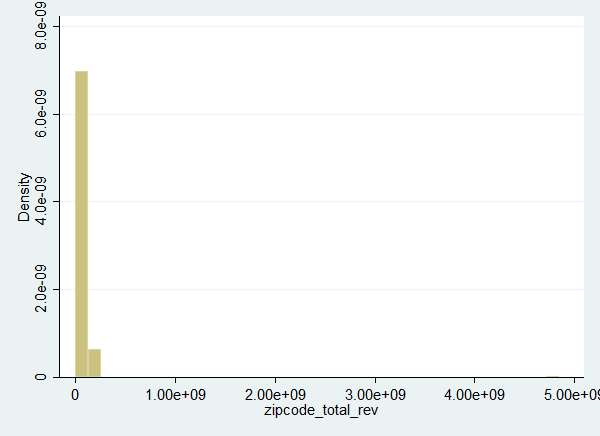

In [37]:
histogram  zipcode_to*

In [38]:
replace zipcode_total_rev=0 if zipcode_total_rev==.

(2,965 real changes made)


In [39]:
gen log_zip_rev=log(1+zipcode_total_rev)

### TODO: label variables

label variable avg_v2 "Avg"
label variable reviews_ct "Reviews Count"
label variable avgmean_others "Avg(Others)"
label variable ent_self "Entropy Own"
label variable ent_others "Entropy Others"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price Diff"
label variable log_zip_rev "Market Revenue"
label variable log_quotes "Activity"
label variable avg_sent_score "Avg Sentiment Score"
label variable avg_sent_score_mkt "Avg Sent(MKT)"
label variable avg_sent_score_others "Avg Sent(Others)"

## Output : Save Data final_step_analysis_ind_jan17.dta

In [43]:
save "../2_pipeline/final_step_analysis_ind_jan17.dta"

file ../2_pipeline/final_step_analysis_ind_jan17.dta saved
